## Note:
This jupiter notebook has been given to us by our teacher in class. At first it consists of markdown boxes and empty code blocks, which have been ran and then deleted, so you can see the result out of their completion, but not the actual code. So my job is to fill in the code blocks. I have refilled all the boxes, by myself, never looking at the solution this time, but sometimes searching the internet for help.

## Unsupervised Learning. Dimensionality Reduction

In **unsupervised learning**, the dataset is a collection of **unlabeled examples** $\{\textbf{x}_i\}_{i=0}^N$
Again, **x** is a feature vector, and the goal of an unsupervised learning algorithm is
to create a model that takes a feature vector **x** as input and either transforms it into
another vector or into a value that can be used to solve a practical problem.

## Types of problems

- **clustering**: the model returns the id of the cluster for each feature vector in the dataset;
- **dimensionality reduction**: the output of the model is a feature vector that has fewer features than the input **x**;
- **outlier detection**: the output is a real number that indicates
how **x** is different from a “typical” example in the dataset.

In [76]:
# Add magic command to delete all saved variables
%reset -f

In [107]:
# Imports and constant values here
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.metrics import adjusted_rand_score

## Clustering

**Clustering** is a problem of learning to assign a label to examples by leveraging an unlabeled
dataset. Because the dataset is completely unlabeled, deciding on whether the learned model
is optimal is much more complicated than in supervised learning.

> **Definition**: A cluster is a group of similar points.

### K-Means

- Divides the dataset into `k` similar groups.
- How does it work? First, you choose `k` — the number of
clusters. Then you randomly put `k` feature vectors, called centroids, to the feature space.
We then compute the distance from each example `x` to each centroid `c` using some metric,
like the Euclidean distance. Then we assign the closest centroid to each example (like if we labeled each example with a centroid id as the label). For each centroid, we calculate the average feature vector of the examples labeled with it. These average feature vectors become the new locations of the centroids. We recompute the distance from each example to each centroid, modify the assignment and
repeat the procedure until the assignments don’t change after the centroid locations were
recomputed. The model is the list of assignments of centroids IDs to the examples.
- Advantages:
  - fast;
  - scales well to large number of samples;
  - has been used across a large range of application areas in many different fields.
- Disadvantages:
  - the initial position of centroids influence the final positions, so two runs of k-means can
result in two different models;
  - the value of `k`, the number of clusters, is a hyperparameter that can be tuned. There are no proven optimal techniques for selecting `k`. Most of them require an `educated guess` by looking at some
metrics or by examining cluster assignments visually;
  - cannot deal with non-linear cluster shapes.

In [78]:
# Use the make_blobs function from sklearn.datasets to create a matrix - X, with 2 columns and 100 rows and a y label.
# Give it a random state of 1. Print X.
X, y = make_blobs(random_state=1)
X

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

In [79]:
# Print y.
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [80]:
X[:, 0]

array([-7.94152277e-01, -9.15155186e+00, -1.14418263e+01, -9.76761777e+00,
       -4.53655648e+00, -6.26302115e+00, -6.38481234e+00, -9.20490564e+00,
       -2.76017908e+00, -1.17104176e+00, -1.00364080e+01, -9.87589123e+00,
       -7.17532921e+00, -2.40671820e+00, -4.87418245e+00, -6.07854700e+00,
       -6.83238762e+00, -2.34673261e+00, -1.03415662e+01, -1.10926243e+01,
       -6.50212109e+00, -1.02639310e+01, -6.81608302e+00, -1.34052081e+00,
       -1.03729975e+01, -7.37499896e+00, -6.62351774e+00, -1.35938959e+00,
       -1.97451969e-01, -6.54430585e+00, -1.92744799e+00, -2.80207810e+00,
       -7.58197664e+00, -1.85139546e+00, -8.37006175e+00, -7.25145196e+00,
       -8.79879462e+00, -1.13708298e+01, -1.01786328e+01, -7.20132693e+00,
       -6.78421711e+00, -9.64716652e+00, -1.98197711e+00, -1.12277706e+01,
       -9.79941278e+00, -6.53541686e+00, -7.57969185e-01,  5.26015501e-01,
       -2.77687025e+00, -1.78245013e+00, -1.02200406e+01, -6.40583239e+00,
       -6.98706106e+00, -

<Axes: >

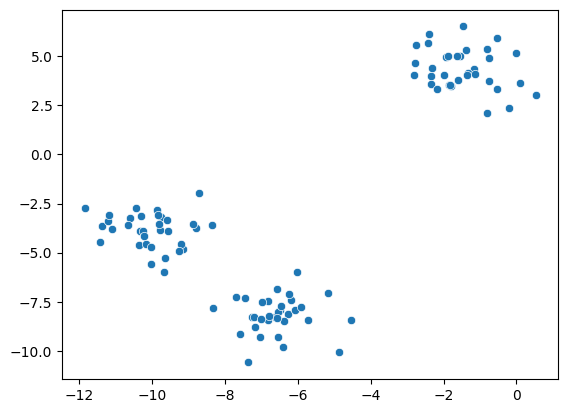

In [81]:
# Plot the two features in X using a scatter plot in seaborn.
sns.scatterplot(x=X[:, 0], y=X[:, 1])

We'll try to get the following diagram but by using K-Means instead of the true labels `y`.

<Axes: >

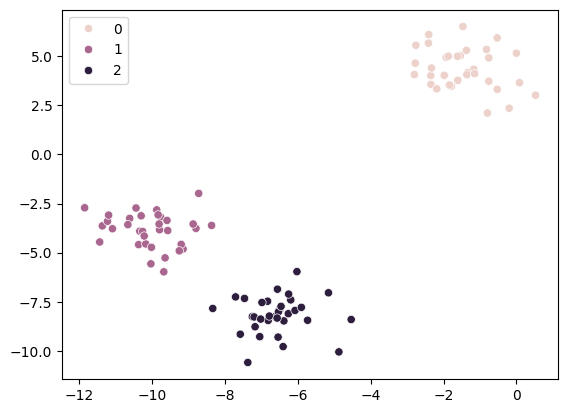

In [82]:
# Plot the two features in X using a scatter plot in seaborn and add a hue parameter that is set to y to color the points based on their classes.
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

#### Trying out an example

In [83]:
KNN = KMeans(n_clusters=3, random_state=2)
KNN

KMeans(n_clusters=3, random_state=2)

In [84]:
KNN.fit(X)

KMeans(n_clusters=3, random_state=2)

In [85]:
# Use the KMeans class from sklearn.cluster to predict class labels for the X matrix.
# Set the number of clusters to 3 and the random state to 2.
# Print the predictions.
predictions = KNN.predict(X)
predictions

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

> **Notes**:
>   1. It may be obvious but the `.fit` method **does not** accept `y`.
>   2. `y_pred` does not necessarily equal `y`. 

In [86]:
# Print the true y labels.
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [87]:
# Compare the predicted and the true outcomes for equality.
predictions == y

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False])

<Axes: >

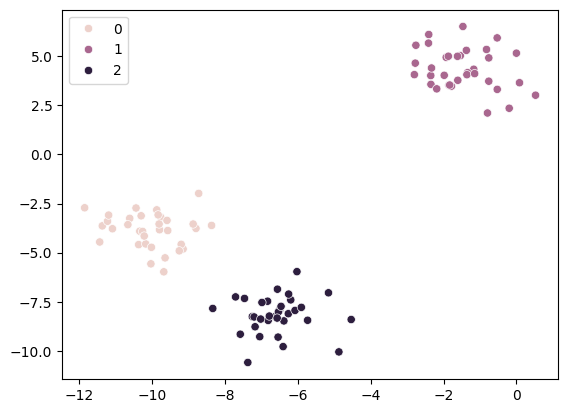

In [88]:
# Plot the two features in X using a scatter plot in seaborn
# but this time set the hue to be the predicted classes.
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

#### Measuring performance

**When we have the true labels**, we can measure the performance of our model by using the metric *adjusted Rand index*. It is a function that measures the similarity of the two assignments, ignoring permutations. Note that this is not accuracy - it is a measure of similarity.

![example_ari](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Example_for_Adjusted_Rand_index.svg/1920px-Example_for_Adjusted_Rand_index.svg.png)

Example clusterings for a dataset with the kMeans (left) and Mean shift (right) algorithms. The calculated Adjusted Rand index for these two clusterings is *ARI≈0.94*.

More on Rand index:
- https://www.youtube.com/watch?v=6rjTIwn0yWI
- https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score
- https://en.wikipedia.org/wiki/Rand_index

**K-Means Objective**

The objective in the K-means is to reduce the sum of squares of the distances of points from their respective cluster centroids. It has other names like J-Squared error function, J-score or within-cluster sum of squares. This value tells how internally coherent the clusters are (the closer to `0`, the better).

**If we didn't know the true labels**, we could use the built-in `.score` method. It returns the negative of the K-means objective. 

> **Note**: Although the result from `.score` might be low, this **does not guarantee** that the clusters are appropriate.

In [89]:
# Import and use the adjusted_rand_score function from sklearn to compare the results from the modelling to the actual labels.
adjusted_rand_score(y, predictions)

1.0

In [90]:
# Print the return value of the `.score` method of the KMeans object.
KNN.score(X)

-156.28289251170003

In [91]:
# Print the coordinates of the cluster centroids using the "cluster_centers_" property of the KMeans object.
KNN.cluster_centers_

array([[-10.04935243,  -3.85954095],
       [ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339]])

If we don't know the number of clusters, K-Means is not that helpful.

<Axes: >

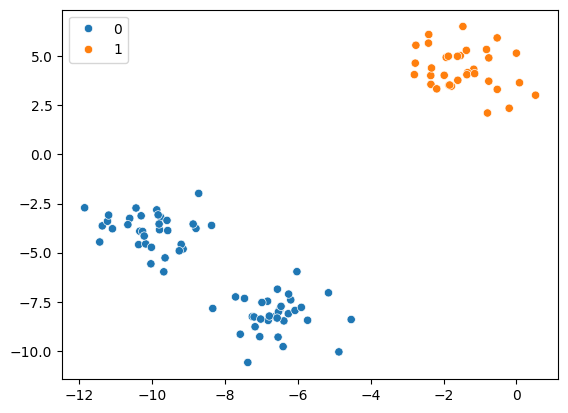

In [92]:
# Create and fit a KMeans object with 2 clusters.
# Plot its predictions against the X matrix.
# Print the ARI (adjusted rand index) and the score.
KNN2 = KMeans(n_clusters=2)
KNN2.fit(X)

predictions = KNN2.predict(X)

adjusted_rand_score(y, predictions)
KNN2.score(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)


<Axes: >

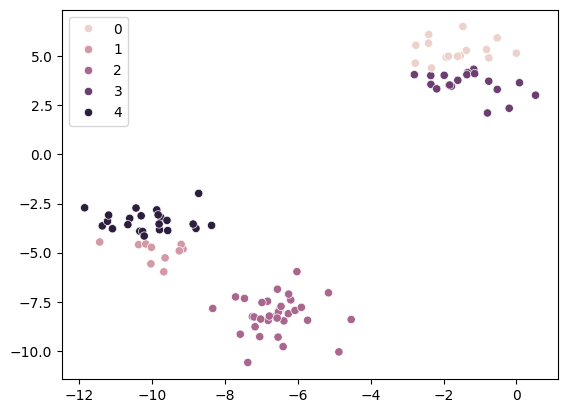

In [93]:
# Create and fit a KMeans object with 5 clusters.
# Plot its predictions against the X matrix.
# Print the ARI (adjusted rand index) and the score.
KNN5 = KMeans(n_clusters=5)
KNN5.fit(X)

predictions = KNN5.predict(X)

adjusted_rand_score(y, predictions)
KNN5.score(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

#### The shape matters

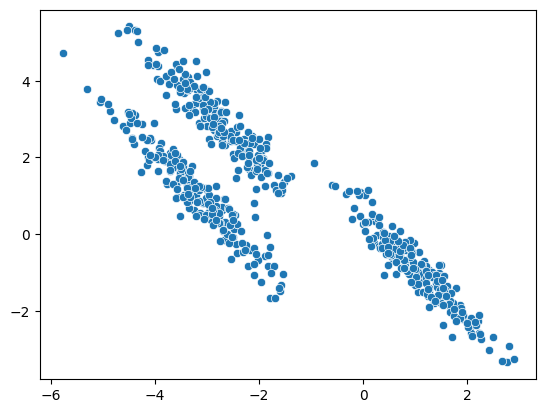

In [94]:
# Use the make_blobs function from sklearn.datasets to create a matrix - X, with 2 columns and 600 rows and a y label.
# Give it a random state of 170.
np.random.seed(74)
X, y = make_blobs(random_state=170, n_samples=600)

# The perform dot product multiplication between it and a 2 x 2 matrix of random floats drawn from the normal distribution.
# Set the seed to be 74. Reassign the result to X.
X = np.dot(X, np.random.randn(2, 2))

# Plot the new values on a scatter plot.
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])


/tmp/ipykernel_10409/905611468.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=KNN3.cluster_centers_[:, 0], y=KNN3.cluster_centers_[:, 1], palette='orange', s=500)


<Axes: >

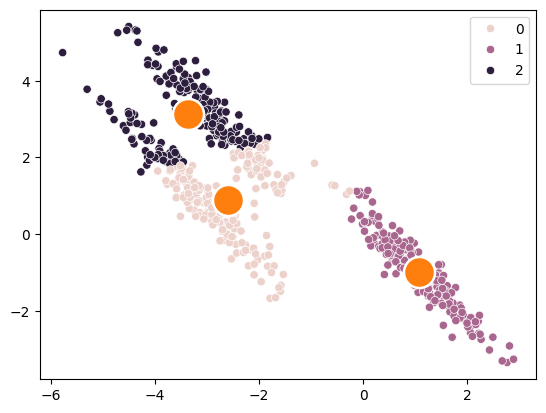

In [95]:
# Use the KMeans algorithm with three clusters to get predicted y labels. Plot them on a scatter plot.
# Use the following code:
# sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], palette='orange', s=500)
# to plot the centroids as well.

KNN3 = KMeans(n_clusters=3)
KNN3.fit(X)

predictions= KNN3.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)
sns.scatterplot(x=KNN3.cluster_centers_[:, 0], y=KNN3.cluster_centers_[:, 1], palette='orange', s=500)

/tmp/ipykernel_10409/535813108.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=KNN2.cluster_centers_[:, 0], y=KNN2.cluster_centers_[:, 1], palette='orange', s=500)


<Axes: >

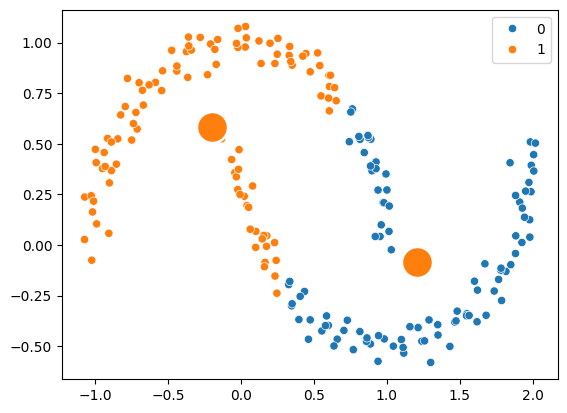

In [96]:
# Use the make_moons function from sklearn.datasets to create a matrix - X, with 2 columns and 200 rows and a y label.
# Set the "noise" parameter of the make_moons function to 0.05 and give it a random state of 0.
# Plot the new values on a scatter plot and the predictions and centroids of KMeans.
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

KNN2 = KMeans(n_clusters=2)
KNN2.fit(X)
predictions= KNN2.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)
sns.scatterplot(x=KNN2.cluster_centers_[:, 0], y=KNN2.cluster_centers_[:, 1], palette='orange', s=500)

### Agglomerative Clustering

How does it work?

1. Every point becomes a cluster.
2. The most "similar" clusters get combined into one.
3. Repeats step 2 until there are $k$ clusters.

In Sklean the definition of similarity is controlled by [the `affinity` and `linkage` hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

Disadvantages:
  - requires `k`;
  - does not perform well on non-linear data since it uses the shortest distance;
  - does not have a `.predict` method.

![Alt](https://cdn-images-1.medium.com/max/800/1*ET8kCcPpr893vNZFs8j4xg.gif)

<Axes: >

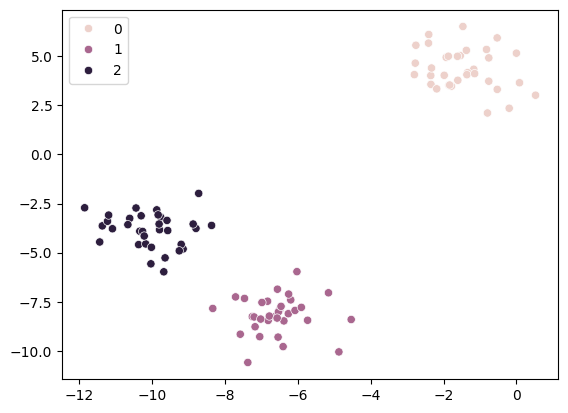

In [97]:
# Use the make_blobs function from sklearn.datasets to create a matrix - X, with 2 columns and 100 rows and a y label.
# Give it a random state of 1.
# Use the "AgglomerativeClustering" class with three clusters to perform clustering and plot the results on a scatter plot.
X, y = make_blobs(n_samples=100, random_state=1)
ag = AgglomerativeClustering(n_clusters=3)

predictions = ag.fit_predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

<Axes: >

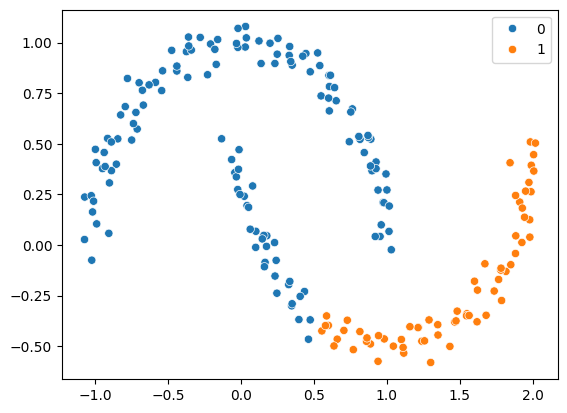

In [98]:
# Use the make_moons function from sklearn.datasets to create a matrix - X, with 2 columns and 200 rows and a y label.
# Give it a random state of 0 and set the noise to 0.05.
# Use the "AgglomerativeClustering" class with two clusters to perform clustering and plot the results on a scatter plot.

X, y = make_moons(n_samples=200, random_state=0, noise=0.05)
ag = AgglomerativeClustering(n_clusters=2)

predictions = ag.fit_predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

# Notice how using the shortest distance as a metric prevents good results.

### DBSCAN

While k-means and similar algorithms are **centroid-based**, Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a **density-based**
clustering algorithm. Instead of guessing how many clusters you need, by using DBSCAN,
you define two hyperparameters: $ϵ$ and $n$.

How does it work?

- two main parameters `eps` and `min_samples`;
- points get classified either as `core sample`, `boundary points`, or `noise`;
  - core samples are points with `min_samples` or more neighbors that are at distance `eps` or less;
  - boundary points are samples that are neighbors of a core sample in the cluster but are not themselves core samples (do not have `min_samples` neighbors);
  - noise is everything else.

Advantages:
  - does not require a number of clusters;
  - can work with any shapes;
  - does not use the shortest distance metric to group samples.

Disadvantages:
  - slow;
  - has two hyperparameters and choosing good values for them (especially `eps`) could be challenging. Furthermore, having `eps` fixed, the clustering algorithm cannot effectively deal with clusters of varying density.

More on DBSCAN: https://scikit-learn.org/stable/modules/clustering.html#dbscan, https://www.youtube.com/watch?v=RDZUdRSDOok

![Alt](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

<Axes: >

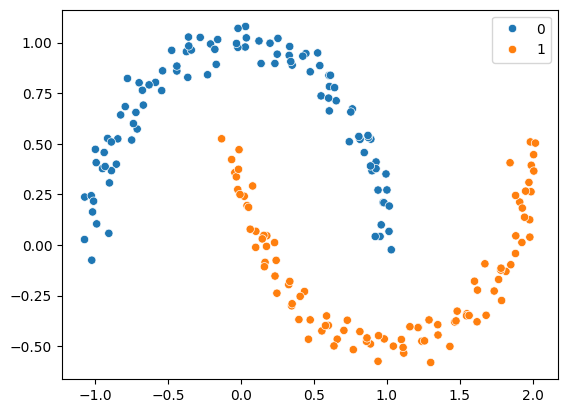

In [99]:
# Use the make_moons function from sklearn.datasets to create a matrix - X, with 2 columns and 200 rows and a y label.
# Give it a random state of 0 and set the noise to 0.05.

X, y = make_moons(n_samples=200, random_state=0, noise=0.05)

# Use the "DBSCAN" class from sklearn with and epsilon value of 0.2.

dbscan = DBSCAN(eps=0.2)

predictions=dbscan.fit_predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

# Notice the quality of the results.

With an appropriate value for `eps`, DBSCAN can handle the strange three clusters we created earlier.

<Axes: >

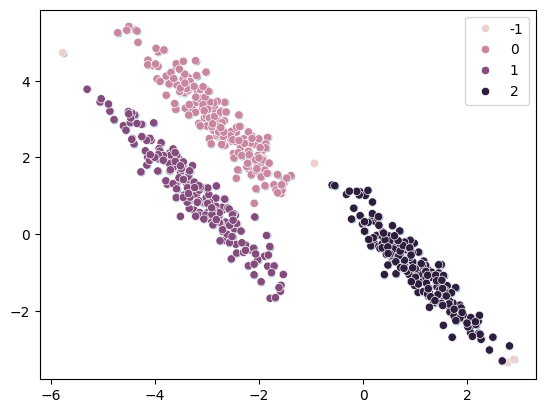

In [100]:
# Use the make_blobs function from sklearn.datasets to create a matrix - X, with 2 columns and 600 rows and a y label.
# Give it a random state of 170.

X, y = make_blobs(n_samples=600, random_state=170)

# The perform dot product multiplication between it and a 2 x 2 matrix of random floats drawn from the normal distribution.
# Set the seed to be 74. Reassign the result to X.

np.random.seed(74)
X = np.dot(X, np.random.randn(2, 2))


# Plot the new values on a scatter plot.

sns.scatterplot(x=X[:, 0], y=X[:, 1])

# Use the DBSCAN class with an epsilon value of 0.4 to get predictions. Plot them on the scatter plot as well.
dbscan = DBSCAN(eps=0.4)
predictions = dbscan.fit_predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)


### HDBSCAN 

Hierarchical Density-Based Spatial Clustering of Applications with Noise - the clustering algorithm that keeps the advantages of DBSCAN while removing the need to decide on the value of `eps`. The algorithm is capable of building clusters of
varying density.

It has one important hyperparameter: `min_cluster_size` - the minimum number of samples to put in a cluster. This hyperparameter is relatively simple to choose by intuition or domain knowledge.

Advantage:

- no hyperparameter tuning.

Disadvantage:

- slow.

<Axes: >

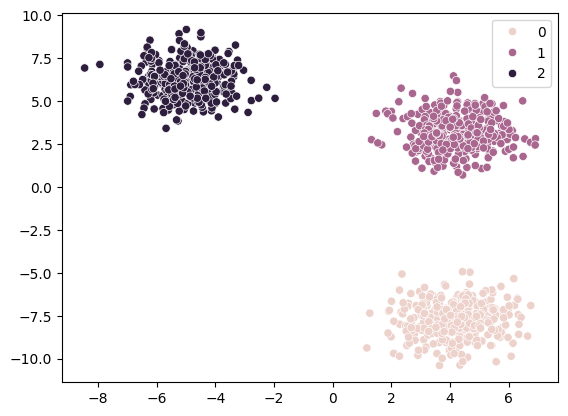

In [102]:
# Use the make_blobs function to create 1000 observations.
# Fit an "HDBSCAN" object with the minimum number of samples equal to 10.
# Plot the predictions.

X, y = make_blobs(n_samples=1000)
hdbscan = HDBSCAN(min_samples=10)

predictions = hdbscan.fit_predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

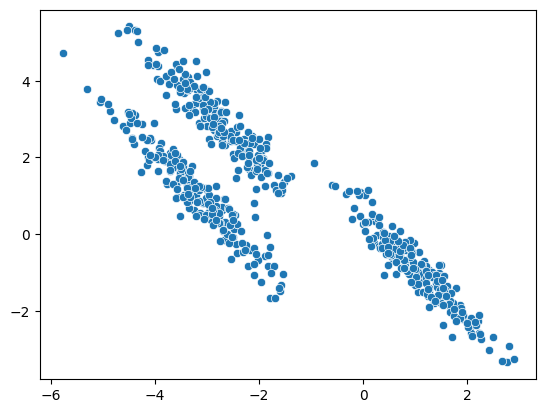

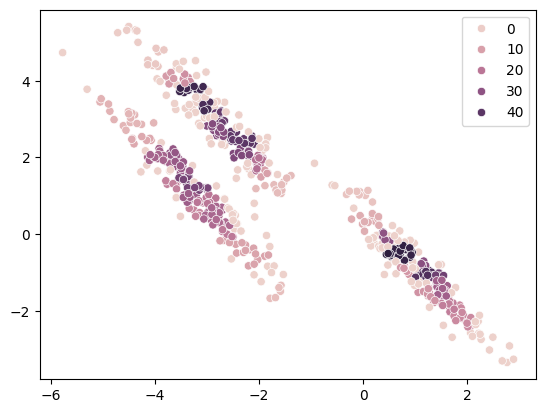

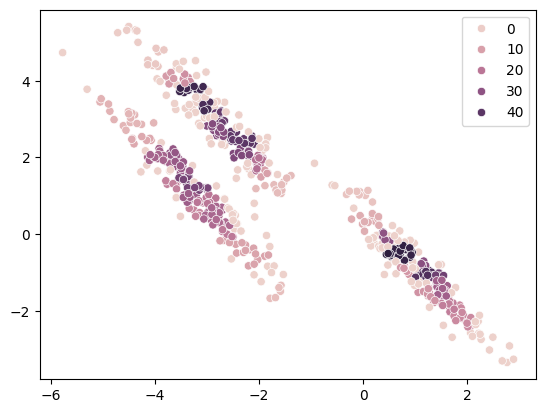

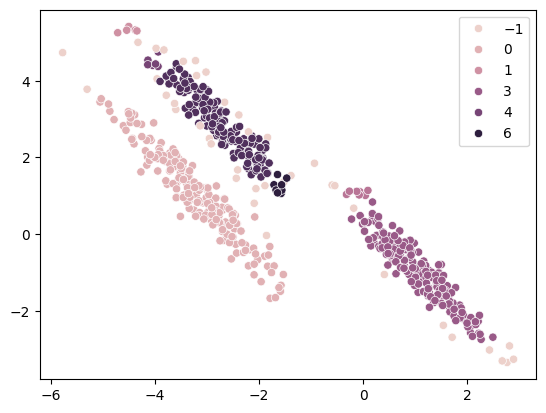

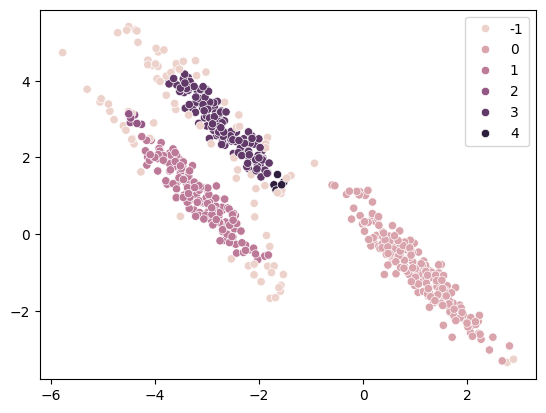

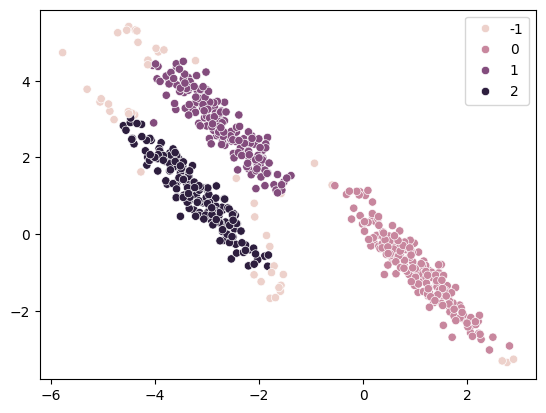

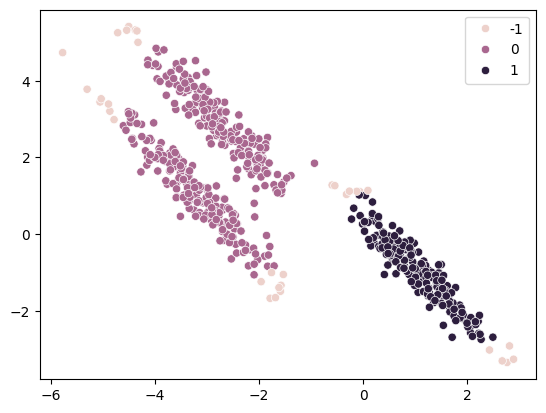

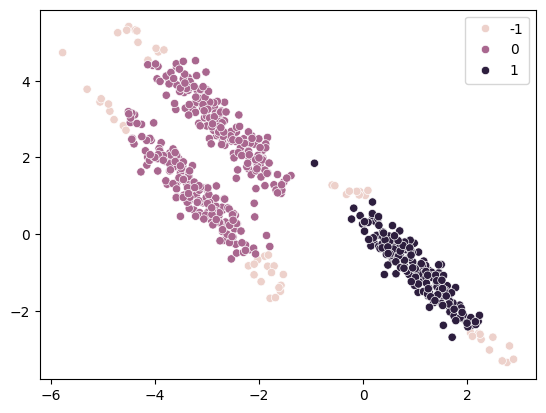

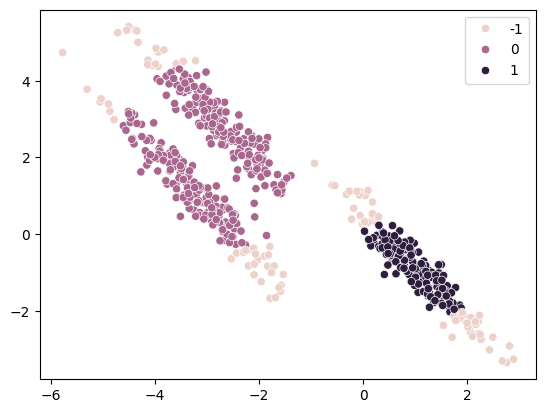

In [108]:
# Use the make_blobs function from sklearn.datasets to create a matrix - X, with 2 columns and 600 rows and a y label.
# Give it a random state of 170.

X, y = make_blobs(n_samples=600, random_state=170)

# The perform dot product multiplication between it and a 2 x 2 matrix of random floats drawn from the normal distribution.
# Set the seed to be 74. Reassign the result to X.

np.random.seed(74)
X = np.dot(X, np.random.randn(2, 2))

# Plot the new values on a scatter plot.

sns.scatterplot(x=X[:, 0], y=X[:, 1])

# Try to find an optimal value for the minimum number of samples parameter to cluster the samples. Plot the clusters.

for i in range (8):
    samples = 2 ** i
    predictions = HDBSCAN(min_samples=samples).fit_predict(X)
    
    plt.figure()
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)
    

We can see that the 5th plot, which corresponds to 2^5 = 32 samples, looks the most promising.

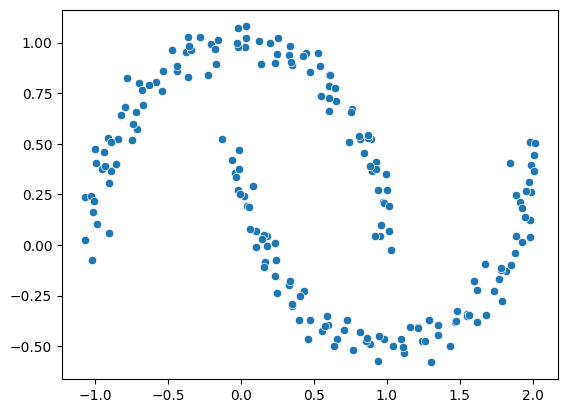

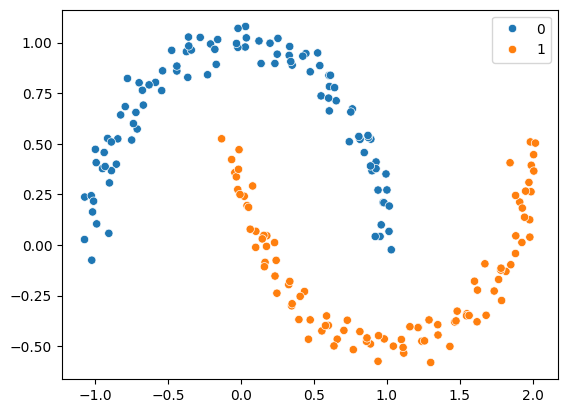

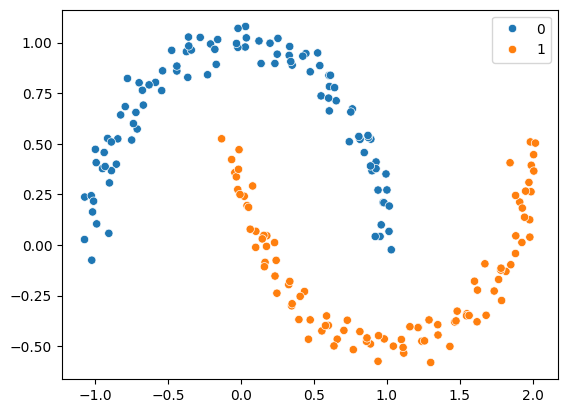

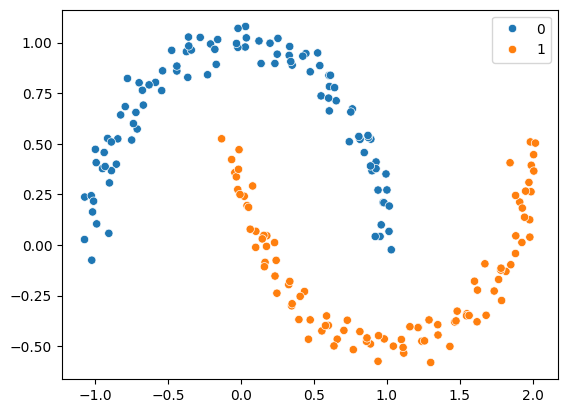

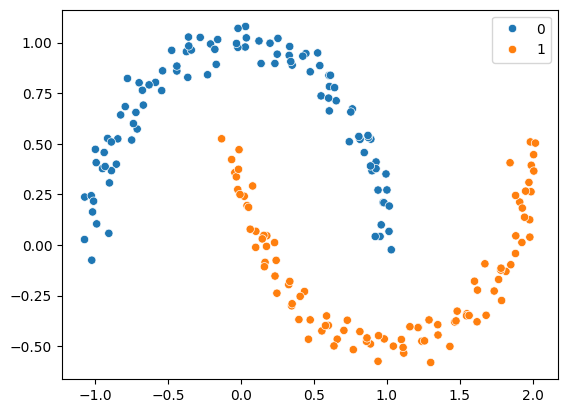

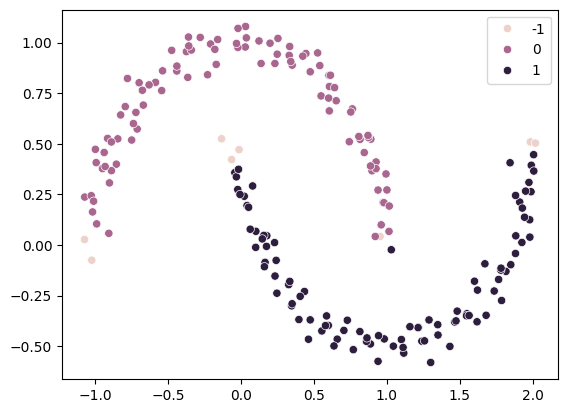

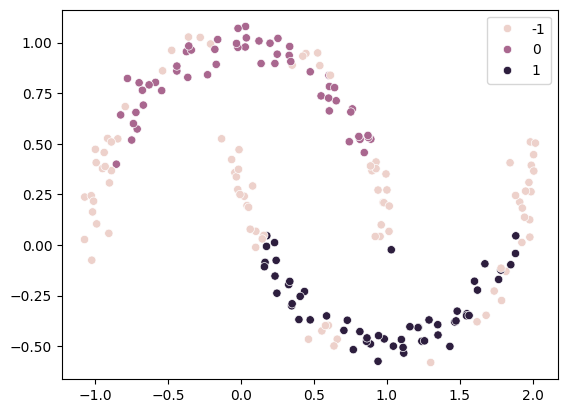

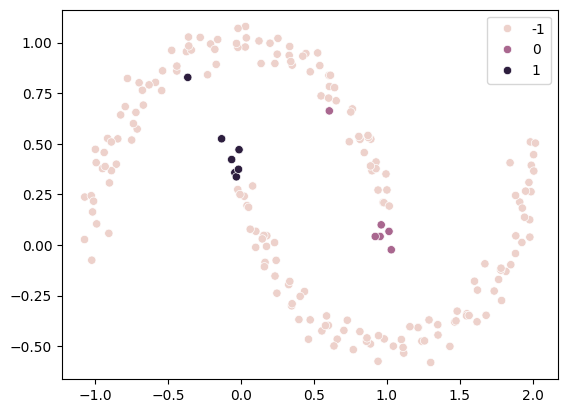

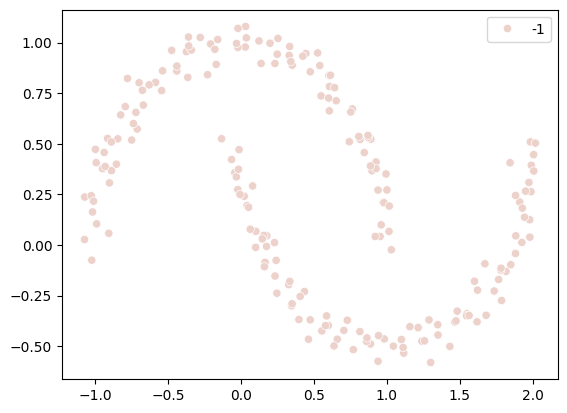

In [109]:
# Use the make_moons function from sklearn.datasets to create a matrix - X, with 2 columns and 200 rows and a y label.
# Give it a random state of 0 and set the noise to 0.05.

# Use the "HDBSCAN" class from sklearn. Find an optimal value of the minimum number of samples parameter.

X, y = make_moons(n_samples=200, random_state=0, noise=0.05)

# Plot the new values on a scatter plot.

sns.scatterplot(x=X[:, 0], y=X[:, 1])

# Try to find an optimal value for the minimum number of samples parameter to cluster the samples. Plot the clusters.

for i in range (8):
    samples = 2 ** i
    predictions = HDBSCAN(min_samples=samples).fit_predict(X)
    
    plt.figure()
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions)

Number of samples between 2 and 32 are perfect, but the noise is set to 0.05. In my opinion if the noise is set higher, the perfect number of samples will be in a smaller interval.

## Dimensionality Reduction

Algorithms for reducing the dimensionality of a dataset while preserving as much information as possible. The ultimate goal is to find the few `latent` (hidden) features that can be used to determine the outcome.

Two ways to do dimensionality reduction (most popular are **bolded**):
  - matrix factorization
    - **principle component analysis (PCA)**
    - **linear autoencoder**
    - latent dirichlet allocation
    - non-negative matrix factorization
    - generalized low rank models
    - Word2Vec
    - GloVe
  - neighbor graphs
    - laplacian eigenmaps
    - hessian eigenmaps
    - local tangent space alignment
    - JSE
    - isomap
    - **t-distributed stochastic neighbor embedding (t-SNE)**
    - locally linear embedding
    - **UMAP**

We'll see `PCA` in the next notebook.

Intuition about eigenvectors and PCA: https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*V4H3Cu8qGr_90WANKSO9BA.gif)